# CMPE482 - Spring 2021 - Assignment 2
**Student ID**: 2017402069 \
**Name**: Nilüfer Çetin \
**Date**: 15.04.2021

The following five questions are part of the Assignment 1 of CMPE482 course. It should be noted that these problems might have various solutions and the guidelines provided by the student might not be the most effective or quickest solutions to exist. 

Firstly, packages that can be used are imported,

In [1]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import scipy.linalg
import random

random.seed(111)

# Question 1

Consider the vector ${v = \begin{bmatrix}4 & -1 \end{bmatrix}}$,

## Q1-Part a
Create a matrix ${R}$ that rotates this vector **30 degrees counterclockwise**. Print the matrix.

This is a vector in ${2-}$dimensional space. For such vectors rotation in counter-clockwise direction with degree ${\theta}$ can be written as,

${x_2 = x_1cos{\theta} - y_1sin{\theta}}$ and ${y_2 = x_1sin{\theta} + y_1cos{\theta}}$ where,

${x_1}$ and ${y_1}$ refer to the original x and y elements/coordinates of the vector and ${x_2}$ and ${y_2}$ refer to the x and y elements/coordinates of the rotated vector. A proof of this can be found in the appendices. To represent this procedure with a **matrix**, 

${\begin{bmatrix} a & b \\ c & d \end{bmatrix}}$ ${\begin{bmatrix} x_1 \\ y_1 \end{bmatrix}}$ ${=}$ ${\begin{bmatrix} x_1cos{\theta} - y_1sin{\theta} \\ x_1sin{\theta} + y_1cos{\theta} \end{bmatrix}}$

Thus,

${ax_1 + by_1 = x_1cos{\theta} - y_1sin{\theta}}$ and ${cx_1 + dy_1 = x_1sin{\theta} + y_1cos{\theta}}$ should hold.

From these, ${a, b, c}$ and ${d}$ is found and plugged in to form the **rotation matrix in ${2-D}$ as**,

${\begin{bmatrix} cos{\theta} & -sin{\theta} \\ sin{\theta} & cos{\theta} \end{bmatrix}}$

In [84]:
#although 30 degrees is trivial, I wanted to demonstrate the use of math functions
R = np.array([[math.cos(math.radians(30)), -(math.sin(math.radians(30)))], 
    [math.sin(math.radians(30)), math.cos(math.radians(30))]])
R

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

## Q1-Part b
Create a matrix ${P}$ that projects this vector onto the line through the vector ${l = \begin{bmatrix}1 & -1\end{bmatrix}}$ .
Print the matrix. (Hint: You can use the formulation on pg. 130)

The **projection matrix** from [IALA - VMLS Book of Stephen Boyd and Lieven Vandenberghe](http://vmls-book.stanford.edu/vmls.pdf) is,

${(\frac{1}{2})\begin{bmatrix} 1 + cos{2\theta} & sin{2\theta} \\ sin{2\theta} & 1 - cos{2\theta} \end{bmatrix}}$

where ${\theta}$ is the angle that the line/vector makes with ${x-}$axis on counter-clockwise fashion. In this example, given the line ${\theta}$ can be found as ${315}$ radian degrees trivially. For more complicated lines, we would need to use the positive/negative ${arctan}$ of ${\frac{y}{x}}$.

In [83]:
P = np.array([[(1+math.cos(math.radians(2*315))), (math.sin(math.radians(2*315)))], 
    [math.sin(math.radians(2*315)), (1-math.cos(math.radians(2*315)))]])
P = 0.5 * P
P

array([[ 0.5, -0.5],
       [-0.5,  0.5]])

## Q1-Part c
Plot the original vector and the rotated and the projected vector.

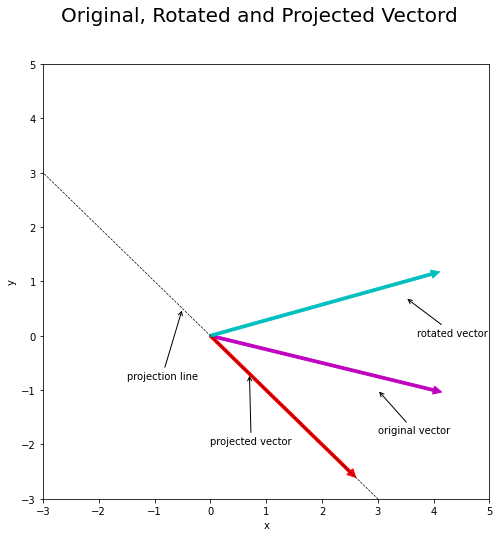

In [85]:
x = np.linspace(-5,5,100) #to draw the line
v = np.array([[4], [-1]]) #vector at hand
v_r = R@v                 #rotated vector
v_p = P@v                 #projected vector
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Original, Rotated and Projected Vectord", size=20)
ax.arrow(0, 0, dx=float(v[0]), dy=float(v[1]), width=0.05, head_width=0.15, head_length=0.15, color='m')
ax.arrow(0, 0, dx=float(v_p[0]), dy=float(v_p[1]), width=0.05, head_width=0.15, head_length=0.15, color='r')
ax.arrow(0, 0, dx=float(v_r[0]), dy=float(v_r[1]), width=0.05, head_width=0.15, head_length=0.15, color='c')
ax.set_xlim(-3,5)
ax.set_ylim(-3,5)
ax.set(ylabel='y', xlabel='x')
ax.annotate("original vector", xy=(3, -1), xytext=(3, -1.8), arrowprops=dict(arrowstyle="->"))
ax.annotate("rotated vector", xy=(3.5, 0.7), xytext=(3.7, 0), arrowprops=dict(arrowstyle="->"))
ax.annotate("projected vector", xy=(0.7, -0.7), xytext=(0, -2), arrowprops=dict(arrowstyle="->"))
ax.annotate("projection line", xy=(-0.5, 0.5), xytext=(-1.5, -0.8), arrowprops=dict(arrowstyle="->"))
plt.plot(x,-x, color='black', ls='--', lw=0.7)

## Q1-Part d
Compute the norm of the original vector, the rotated vector, and the projected vector. How do they compare?

In [86]:
print("Norm of original vector is: " +str(round(np.linalg.norm(v),5)))  ##finding the norms
print("Norm of rotated vector is: " +str(round(np.linalg.norm(v_r),5)))
print("Norm of projected vector is: " +str(round(np.linalg.norm(v_p),5)))

Norm of original vector is: 4.12311
Norm of rotated vector is: 4.12311
Norm of projected vector is: 3.53553


Rotation is basically changing the orientation/direction of a vector for a specified degrees. It does not acutally create a new vector. Hence, the rotated vector should be of same length with the original vector. 

One definition for projection on the other hand can be finding the component of a vector on a given direction. Thus, if an artificial coordinate system were to be invented with one of the axes being the projection line, by trigometry it can be seen that once projected the vector would **shrink** by ${\theta}$ where ${cos\theta}$ is the acute angle between the vector and artificially created axis. Since cosine can never be greater than ${1}$, unless the vector is projected on the line it goes through, the projected vector's norm will be smaller.

## Q1-Part e
Plot columns of ${R}$ and ${P}$. What properties (or lack thereof) of ${R}$ and ${P}$ lead to this? (Hint: What property of their columns can explain this?)

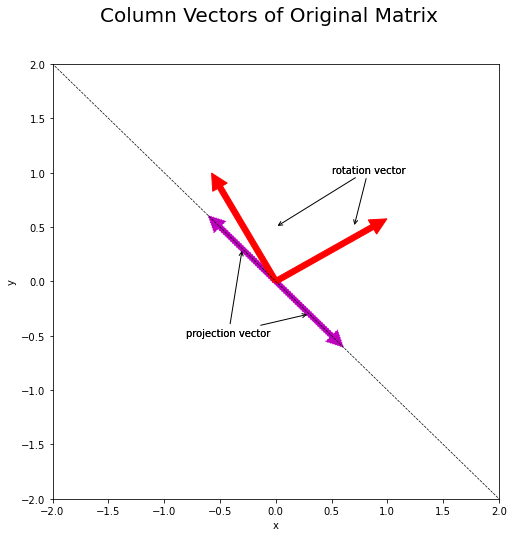

In [87]:
P_col1 = P[:,0]           ##choosing columns
P_col2 = P[:,1]
R_col1 = R[:,0]           ##choosing columns
R_col2 = R[:,1]


fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Column Vectors of Original Matrix", size=20)
ax.arrow(0, 0, *P_col1, width=0.05, head_width=0.15, head_length=0.15, color='m', ls=":")
ax.arrow(0, 0, *P_col2, width=0.05, head_width=0.15, head_length=0.15, color='m', ls=":")
ax.arrow(0, 0, *R_col1, width=0.05, head_width=0.15, head_length=0.15, color='r')
ax.arrow(0, 0, *R_col2, width=0.05, head_width=0.15, head_length=0.15, color='r')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set(ylabel='y', xlabel='x')
ax.annotate("rotation vector", xy=(0, 0.5), xytext=(0.5, 1), arrowprops=dict(arrowstyle="->"))
ax.annotate("rotation vector", xy=(0.7, 0.5), xytext=(0.5, 1), arrowprops=dict(arrowstyle="->"))
ax.annotate("projection vector", xy=(-0.3, 0.3), xytext=(-0.8, -0.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("projection vector", xy=(0.3, -0.3), xytext=(-0.8, -0.5), arrowprops=dict(arrowstyle="->"))
plt.plot(x,-x, color='black', ls='--', lw=0.7)

When this plot is examined, it can be seen that the angle between the columns of **rotation vector** looks like 90 degrees, while the columns of **projection vector** lie on the same line. Also, the norm of columns of the **rotation vector** is ${1}$. Hence, the columns of rotation vector is actually **orthonormal**. It should also be noted that, the column interpretation of **matrix-vector multiplication** is that the resulting vector ${v_j = Jv}$ is the linear combination of columns of matrix ${J}$ with coefficients of elements of ${v}$.

Consequently, it can be commented that the process of rotation finds and composes two **orthogonal** components two create a new rotated vector while **in this example** the process of projection composes two vectors in opposite directions. Hence, while rotation can preserve the norms, the components may have probably cancelled each other out in the process of projection leaving a smaller resulting vector.

Mathematically, without loss of generality, if rotation matrix is represented as,

${\begin{bmatrix} a & b \\ c & d \end{bmatrix}}$ where 

${\begin{bmatrix} a & c \end{bmatrix}}$ ${\begin{bmatrix} b \\ d \end{bmatrix}}$ ${= ab + cd = 0}$  because of orhtogonality of columns.

Moreover, ${a^2 + c^2 = 1}$ and ${b^2 + d^2 = 1}$. So that columns are **orthonormal**.

Hence, for any vector ${\in \mathbb{R}^2}$, ${\begin{bmatrix} e \\ f \end{bmatrix}}$ with norm ${e^2 + f^2}$ rotation can be expressed as a linear function with,

${\begin{bmatrix} a & b \\ c & d \end{bmatrix}}$ ${\begin{bmatrix} e \\ f \end{bmatrix}}$ = ${\begin{bmatrix} ea + bf \\ ec + df \end{bmatrix}}$

The norm of rotated vector is,

${(ea + bf)^2 + (ec + df)^2 = e^2a^2 + 2eabf + b^2f^2 + e^2c^2 + 2ecdf + d^2f^2 = e^2(a^2 + c^2) + 2ef(ab + cd) + f^2(b^2 + d^2)}$

From previously described properties of **orthonormality** of columns this norm equals to, ${e^2 + f^2}$. The norm of the original vector.

Thus, for any matrix where the columns are orthonormal, the norm can be preserved. For rotation matrix, the columns are orthonormal and for projection matrix they are not. This property leads to the difference in behavior of these two transformations.

# Question 2
Create and fix a vector ${v \in \mathbb{R}^5}$ by randomly sampling each entry from the unit Gaussian.

In [20]:
v = np.random.normal(0, 1, (5,1)) #constructing the vector in R^5

## Q2-Part a
Design a matrix ${S}$ that sorts ${v}$ in an **ascending** order, creating the sorted vector ${v_s}$. Print ${v}$, ${S}$, and ${v_s}$.

Without any comparison tool, it is impossible to create a matrix to work on any vector and sort elements in ascending or descending order. So, the vector ${S}$ will be special to the vector ${v}$ and the way its elements are sorted with respect to one another.

A simple generalization for such cases is a ${n x n}$ matrix ${A}$ where ${n}$ is the dimension of the vector. Such that ${A}$ is a sparse matrix in which there is only one ${1}$ in every row and column. Although this matrix would be randomly shuffling the vector elements, by arranging the position of ${1}$s the desired matrix can be gathered.

That is, for row ${i}$ only the ${j^{th}}$ element where ${j}$ is the row of the element which is needed to become the ${i^{th}}$ element of the final matrix, in the original vector. To put it differently, each element is mapped from ${j}$ to ${i}$, where ${i}$ is their rank in ascending order.

In [21]:
v

array([[ 0.48137353],
       [-0.39634584],
       [-0.88765851],
       [ 0.46259464],
       [ 0.28784401]])

In [22]:
S = np.array([[0,0,1,0,0], [0,1,0,0,0], [0,0,0,0,1], [0,0,0,1,0], [1,0,0,0,0]]) #in each row there are one 1 and all zeros
S

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]])

In [23]:
v_s = S@v
v_s

array([[-0.88765851],
       [-0.39634584],
       [ 0.28784401],
       [ 0.46259464],
       [ 0.48137353]])

## Q2-Part b
Create a matrix ${K}$ that reverses the order of the sorted vector ${v_s}$, creating a vector called ${v_k}$. Print ${K}$ and ${v_k}$.

To generalize, any sorted vector ${\in \mathbb{R}^n}$ can be sorted in the reverse direction by a similar permutation matrix mentioned in previous part. The rule here is that the ${i^{th}}$ element in originally sorted vector is needed to be in ${{n+1-i}^{th}}$ position in the re-ordered matrix. So the rule for sparse matrix ${K}$ will be,

${K_{i,j} = 1}$, if i+j = n+1    
${K_{i,j} = 0}$, else. 

In [24]:
K = np.array([[0,0,0,0,1], [0,0,0,1,0], [0,0,1,0,0], [0,1,0,0,0], [1,0,0,0,0]]) ##creating the reversal matrix
K

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [25]:
v_k = K@v_s
v_k

array([[ 0.48137353],
       [ 0.46259464],
       [ 0.28784401],
       [-0.39634584],
       [-0.88765851]])

## Q2-Part c
Using ${S}$ and ${K}$, this time first reverse the original vector ${v}$ and then apply the sorting, creating the new vector ${v_z}$. Are ${v_z}$ and ${v_k}$ the same or are they different?

In [27]:
v_z = K@v      #reversed
v_z = S@v_z    #sorted(supposedly)
v_z

array([[-0.88765851],
       [ 0.46259464],
       [ 0.48137353],
       [-0.39634584],
       [ 0.28784401]])

As can be seen ${v_z}$ and ${v_k}$ are **different**.

## Q2-Part d
Use ${K}$ to reverse every column of ${S}$ to create a new sorting matrix ${\hat{S}}$. Then sort ${v}$ using ${\hat{S}}$ to create ${v_h}$. Are ${v_h}$ and ${v_k}$ the same or are they different?

In [28]:
S_hat = K@S   #reversed the specific sorting matrix
S_hat

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [29]:
v_h = S_hat@v #sorted
v_h

array([[ 0.48137353],
       [ 0.46259464],
       [ 0.28784401],
       [-0.39634584],
       [-0.88765851]])

As can be seen ${v_h}$ and ${v_k}$ are the **same**.

## Q2-Part e
What properties questions 2c and 2d demonstrate about matrix multiplication?

Part c ${\Rightarrow}$ the process is ${v_z = S(Kv)}$
Part d ${\Rightarrow}$ the process is ${v_h = (KS)v}$

Originally ${v_k = Kv_s}$ where ${v_s = Sv}$ and thus, ${v_k = K(Sv)}$.   And, ${v_k = v_h \neq v_z}$

In part c, the relative order of multiplications changes whereas in part d, the processes are grouped but order of multiplications is preserved. Part d preserves the equality because matrix multiplication is **associative**. Part c does not preserve the equality because matrix multiplication is **not commutative**. In other words,

${(AB)C = A(BC)}$ (associative)

${AB \neq BA}$, in general (not commutative) 

# Question 3
Given a vector ${v = \begin{bmatrix} 1 & -4 & 3 & 7 & 0 & -3\end{bmatrix} \in \mathbb{R}^6}$,

In [2]:
v3 = np.array([[1],[-4],[3],[7],[0],[-3]])
v3

array([[ 1],
       [-4],
       [ 3],
       [ 7],
       [ 0],
       [-3]])

## Q3-Part a
Create a matrix ${T}$ that produces a smoothed vector ${\hat{v} = Tv}$, ${\hat{v} \in \mathbb{R}^4}$ such that ${\hat{v_i} = 0.1v_i + 0.3v_{i+1} + 0.6v_{i+2}}$ for ${i \in 1,2,3,4}$. Print ${T}$ and ${\hat{v}}$.

By row interpretation of matrix-vector multiplication, it can be interpreted that the ${i^{th}}$ element of ${\hat{v}}$ should be composing of weighted sum of ${i^{th}, {(i+1)}^{th}}$ and ${{(i+2)}^{th}}$ elements of ${{i}^{th}}$ row of ${v}$. Accordingly ${T}$ is constructed as a ${4 x 6}$ matrix mapping from ${\mathbb{R}^6}$ to ${\mathbb{R}^4}$.

In [3]:
T = np.array([[0.1,0.3,0.6,0,0,0], [0,0.1,0.3,0.6,0,0], [0,0,0.1,0.3,0.6,0], [0,0,0,0.1,0.3,0.6]])
T

array([[0.1, 0.3, 0.6, 0. , 0. , 0. ],
       [0. , 0.1, 0.3, 0.6, 0. , 0. ],
       [0. , 0. , 0.1, 0.3, 0.6, 0. ],
       [0. , 0. , 0. , 0.1, 0.3, 0.6]])

In [4]:
v3_hat = T@v3
v3_hat

array([[ 0.7],
       [ 4.7],
       [ 2.4],
       [-1.1]])

## Q3-Part b
Does ${T}$ correspond to a linear function? Demonstrate.

Yes, it corresponds since matrix-vector multiplication composes of inner products of rows of the matrix with the column vector. Because any linear function can be represented as an inner product of vectors, ${T}$ can be thought of as a linear function ${f}$ where ${f(\overrightarrow x) = T\overrightarrow x}$ with its domain ${\in \mathbb{R}^6}$ and its range ${\in \mathbb{R}^4}$. To demonstrate, linear functions also obey **superposition**,

${f(a\overrightarrow x + b\overrightarrow y) = T(a\overrightarrow x + b\overrightarrow y)}$, where ${\overrightarrow x, \overrightarrow y}$ are vectors in ${6-}$dimensional space and ${a, b}$ are coefficients. By **distributive** property of matrix-vector multiplication,

${f(a\overrightarrow x + b\overrightarrow y) = Ta\overrightarrow x + Tb\overrightarrow y}$. By **commutative** property of scalar-matrix multiplication,

${f(a\overrightarrow x + b\overrightarrow y) = aT\overrightarrow x + bT\overrightarrow y}$, where,

${f(a\overrightarrow x) = af(\overrightarrow x) = aT\overrightarrow x}$ and ${f(b\overrightarrow y) = bf(\overrightarrow y) = bT\overrightarrow y}$. Hence,

${f(a\overrightarrow x + b\overrightarrow y) = af(\overrightarrow x) + bf(\overrightarrow y)}$.

It is proven that the function ${f}$ obeys superposition. So ${f}$ is linear and  ${f: \mathbb{R}^6 \to \mathbb{R}^4}$ such that,

${f(x_1,x_2,x_3,x_4,x_5,x_6) = ((0.1x_1 + 0.3x_2 + 0.6x_3), (0.1x_2 + 0.3x_3 + 0.6x_4), (0.1x_3 + 0.3x_4 + 0.6x_5), (0.1x_4 + 0.3x_5 + 0.6x_6))}$

## Q3-Part c
Imagine ${\hat{T}}$ such that ${\hat{T}\hat{v} = v}$. Can such a ${\hat{T}}$ exist? If yes, please print the matrix. If not, please explain why. (Hint: Is ${T}$ invertible?)

Since ${\hat{v} = Tv}$, if there exists a ${6 x 4}$ matrix ${A}$ such that,

${AT = I_{6x6}}$ then,

${A\hat{v} = ATv = Iv = v}$, so that ${\hat{T}}$ is A with property ${\hat{T}T = I_{6x6}}$.

Because ${T}$ is a **wide** matrix the only way for ${\hat{T}T = I_{6x6}}$ to hold is for ${\hat{T}}$ to be the **left inverse** of ${T}$. However, only **tall** matrices have **left inverses** so no such ${\hat{T}}$ exists.

## Q3-Part d
Express the relationship between ${\hat{T}, \hat{v}}$ and ${v}$ as a system of linear equations (even if a perfect solution is not feasible). Is this an overdetermined or underdetermined system? Why?

From part c, a perfect solution is not feasible since ${\hat{T}}$ is desired to be mapping vectors from ${\mathbb{R}^4}$ to a certain vector in ${\mathbb{R}^6}$. Or to put it differently from column interpretation, it will be an attempt to create the vector ${v}$ in ${\mathbb{R}^6}$ composed of a certain combination of 4 other vectors in ${\mathbb{R}^6}$. However, to define a vector in ${\mathbb{R}^6}$, actually ${6}$ linearly independent dimensions or directions are needed. Thus, ${v}$ can only be approximated as ${\hat{T}\hat{v}}$.

${\hat{T}\hat{v} \approx v}$

This is an **over-determined system**, since there are more equations than unknowns (4 unknown vectors and 6 row equations). Hence, a perfect solution is not feasible. 

Although it should be noted that there are many possible matrices that map ${\hat{v}}$ to ${v}$. The main idea in this question is to find a matrix representation of a function which is the inverse of ${f}$ mentioned in answer to part b. Though there are many vectors to establish this relation between ${\hat{v}}$ and ${v}$, these are not generalizing to the desired relation between the domain of vectors in ${4-}$dimensions and the range of vectors in ${6-}$dimensions. Thus, a matrix representation of the ${f'}$ cannot be found.

## Q3-Part e
Apply least-squares method to create a best approximation of ${v}$ from ${\hat{v}}$, called ${\tilde{v}}$. Print ${\tilde{v}}$.

A ${\hat{T}}$ such that ${\hat{T} \hat{v} \approx v}$ is being searched. In other words since ${\hat{v} = Tv}$,

${\hat{T}Tv \approx v}$ 

Since ${T}$, being a **wide** matrix does not have any left inverse the objective is to find the minimum lenght eror vector ${e}$ where,

${e = v - \hat{T}Tv}$

Since a length cannot be smaller than 0, the minimum value of the vector ${e}$ is reached when ${\hat{T}T = I}$ as ${e = v - Iv}$ becomes ${0}$. There is no perfect ${\hat{T}}$ but to make matters simple, the problem can be expressed and solved as,

min ${||e_1||}$ where ${e_1 = \hat{T}T - I}$

As can be seen, the **main question** is to find a least squares approximation to left inverse of a wide matrix that does not have any left inverse. A similar question is presented in the book [IALA 12.5](http://vmls-book.stanford.edu/vmls.pdf) to approximate the right inverse of a tall matrix. The solution interestingly comes out to be the **left inverse** of the matrix and the full least square solution to this problem presented by the book can be found on appendices. 

Keeping this in mind, another valuable information is that the left inverse of a matrix, if exists, is actually right inverse of its transpose. Or conversely, the right inverse of a matrix, if exists, is actually left inverse of its transpose. A simple illustration would be,

If ${AB = I}$, where ${B}$ is a matrix with linearly independent columns and ${A}$ is the left transpose of ${B}$. Taking the **transpose** of both sides,

${B^TA^T = I}$, now ${A^T}$ is the right inverse of ${B^T}$. A similar derivation also applies to the right transpose of ${B}$, if exists.

With these two derivations, instead of approximating the left inverse of ${T}$, a right inverse for ${T^T}$ can be approximated and then the transpose of this approximation matrix can be taken as the **actual approximation to the left inverse of ${T}$**. Moreover, as pointed in the solution to [IALA 12.5](http://vmls-book.stanford.edu/vmls.pdf), the least squares approximation to the right inverse of ${T^T}$ is the left inverse of ${T^T}$. Taking the transpose of this approximation matrix, can be found the right inverse of ${T}$ as the least squares solution to the problem.

${T^{-R}\hat{v} \approx v}$, with ${T^{-R}}$ being the right inverse of ${T}$

${T^{-R}\hat{v} = \tilde{v} \approx v}$

In [6]:
v3_tilde = sp.linalg.pinv(T)@v3_hat    #right inverse is found and multiplied to v_hat to get v_tilde
v3_tilde

array([[-0.40754414],
       [-0.07972939],
       [ 1.27445538],
       [ 7.20939387],
       [ 0.18289383],
       [-3.1263459 ]])

## Q3-Part f
Is ${\hat{T}}$ a (pseudo-)inverse of ${T}$? If yes, which one?

Yes, as mentioned on part e, it is actually the right inverse of ${T}$.

# Question 4
[IALA, Q11.12](http://vmls-book.stanford.edu/vmls.pdf) Combinations of invertible matrices. Suppose the ${n x n}$ matrices ${A}$ and ${B}$ are both invertible. Determine whether each of the matrices given below is invertible, without any further assumptions about ${A}$ and ${B}$.

## Q4-Part a
${A + B}$

A **counter example** would be,

${A = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}}$ and ${B = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}}$, both invertible with orthonormal columns where,

${A + B = \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}}$ is not invertible with linearly dependent columns.

**False**, not invertible without any further assumption.

## Q4-Part b
${\begin{bmatrix} A & 0 \\ 0 & B \end{bmatrix}}$

If both ${A}$ and ${B}$ are **invertible** than there should be ${A^{-1}}$ and ${B^{-1}}$. From block matrices multiplication formula,

${\begin{bmatrix} X & Y \\ Z & T \end{bmatrix}}$ ${\begin{bmatrix} P & R \\ S & U \end{bmatrix}}$ = ${\begin{bmatrix} XP + YS & XR + YU \\ ZP + TS & ZR + TU \end{bmatrix}}$ where all ${X,Y,Z,T,P,R,S,U}$ are matrices with proper sizes.

Hence, without loss of generality a matrix ${M}$ can be constructed as the inverse where,

${M}$ = ${\begin{bmatrix} A^{-1} & 0 \\ 0 & B^{-1}\end{bmatrix}}$ and,

${M \begin{bmatrix} A & 0 \\ 0 & B \end{bmatrix} = \begin{bmatrix} A^{-1} & 0 \\ 0 & B^{-1}\end{bmatrix} \begin{bmatrix} A & 0 \\ 0 & B \end{bmatrix} = \begin{bmatrix} A^{-1}A & 0 \\ 0 & B^{-1}B \end{bmatrix} = \begin{bmatrix} I & 0 \\ 0 & I \end{bmatrix} = I}$ 

Same logic applies as ${\begin{bmatrix} A & 0 \\ 0 & B \end{bmatrix} M = I}$

**True**, invertible without any further assumption.

## Q4-Part c
${\begin{bmatrix} A & 0 \\ A + B & B \end{bmatrix}}$

If both ${A}$ and ${B}$ are **invertible** than there should be ${A^{-1}}$ and ${B^{-1}}$. If there exists a matrix in the form,

${\begin{bmatrix} x & y \\ z & t \end{bmatrix}}$, where ${x, y, z}$ and ${t}$ are also matrices that have complying sizes with ${A, B}$ and ${A + B}$ for multiplication. For this matrix to be the inverse of the matrix questioned,

${\begin{bmatrix} A & 0 \\ A + B & B \end{bmatrix}}$ ${\begin{bmatrix} x & y \\ z & t \end{bmatrix}}$ = ${\begin{bmatrix} I & 0 \\ 0 & I \end{bmatrix} = I}$ should hold.

Again from block matrices multiplication formula there can be listed 4 equations,

${Ax = I .................1}$

${Ay = 0 .................2}$

${Ax + Bx + Bz = 0 ......3}$

${Ay + By + Bt = I .......4}$

From ${1}$ ${\to x = A^{-1}}$ and from ${2}$ ${\to y = 0}$. When these are plugged into ${3}$ and ${4}$ for the equalities to hold,

${t = B^{-1}}$ and ${z = -A^{-1} -B^{-1}}$. Then the matrix is,

${\begin{bmatrix} A^{-1} & 0 \\ -A^{-1}-B^{-1} & B^{-1} \end{bmatrix}}$

However, the matrix is found as the right inverse. To prove that it is also the left inverse and unique thus that the matrix at question is invertible,

${\begin{bmatrix} A^{-1} & 0 \\ -A^{-1}-B^{-1} & B^{-1} \end{bmatrix}}$ ${\begin{bmatrix} A & 0 \\ A + B & B \end{bmatrix} = I}$ should hold.

${\begin{bmatrix} A^{-1} & 0 \\ -A^{-1}-B^{-1} & B^{-1} \end{bmatrix}}$ ${\begin{bmatrix} A & 0 \\ A + B & B \end{bmatrix}}$ ${=}$ ${\begin{bmatrix} A^{-1}A & 0 \\ A^{-1}A + A^{-1}B -A^{-1}B - B^{-1}B & B^{-1}B \end{bmatrix}}$ ${= I}$ holds!

**True**, invertible without any further assumption.

## Q4-Part d
${ABA}$

It is known for a fact that there exists unique ${A^{-1}}$ and ${B^{-1}}$. Moreover, since there is a matrix ${ABA}$, ${A}$ and ${B}$ are square matrices of same sizes ${m x m}$. Then, ${A^{-1}}$ and ${B^{-1}}$ are also of size ${m x m}$. If the following procedures are followed,

${A^{-1}(ABA) = I_{mxm}BA = BA}$

${B^{-1}A^{-1}(ABA) = B^{-1}BA = I_{mxm}A = A}$

${A^{-1}B^{-1}A^{-1}(ABA) = A^{-1}A = I_{mxm}}$

Thus, there exists a unique inverse in the form of, ${A^{-1}B^{-1}A^{-1}}$.

**True**, invertible without any further assumption.

# Question 5
Implement the following steps:

## Q5-Part a
Generate 20 equispaced points in the interval ${[-1,1]}$, i.e. with equal intervals among them.

In [2]:
pts = np.linspace(-1,1,20) #as hinted to create equispaced points on a specific interval

## Q5-Part b
For all 20 points compute ${y = sin(2{\pi}x/T) + {\epsilon}}$, where ${{\epsilon} \in \sim N(0, {\sigma}^2I)}$ with ${{\sigma} = 0.1}$. Create a scatter plot of ${x}$ vs ${y}$ for the 20 points you generated for period parameter ${T = 1.5}$.

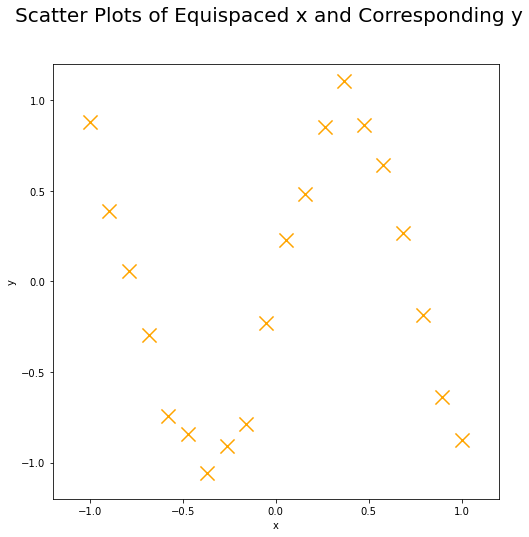

In [3]:
pts_y = (2/1.5)*math.pi*pts               #arguments in sine
pts_y = np.sin(pts_y)                     #taking sines 
eps = np.random.normal(0, 0.1, (1,20))    #creating random noise
pts_y = eps + pts_y                       #adding the random component
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Scatter Plots of Equispaced x and Corresponding y", size=20)
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set(ylabel='y', xlabel='x')
plt.scatter(pts,pts_y, marker='x', color='orange', s=200)

## Q5-Part c
For approximating ${y}$ with a polynomial of degree at most 10, construct the Vandermonde matrix ${V}$ based on ${x}$, where ${V}$ has the form ${V_{ij} = x_i^j}$.

In [4]:
vander = np.zeros((20,11))           #Vandermonde matrix of degree at most 10, each row for one of the 20 x values

for i in range(0,len(vander)):
    for j in range(0,11):
        vander[i][j] = (pts[i])**j

## Q5-Part d
Compute the ${QR}$ decomposition of ${V}$. Let ${q_0, .... , q_{10}}$ be the columns of ${Q}$, Plot each of the first 5 individual columns of the matrix ${Q}$ against ${x}$ as a scatter plot, similar to that of in Q5b.

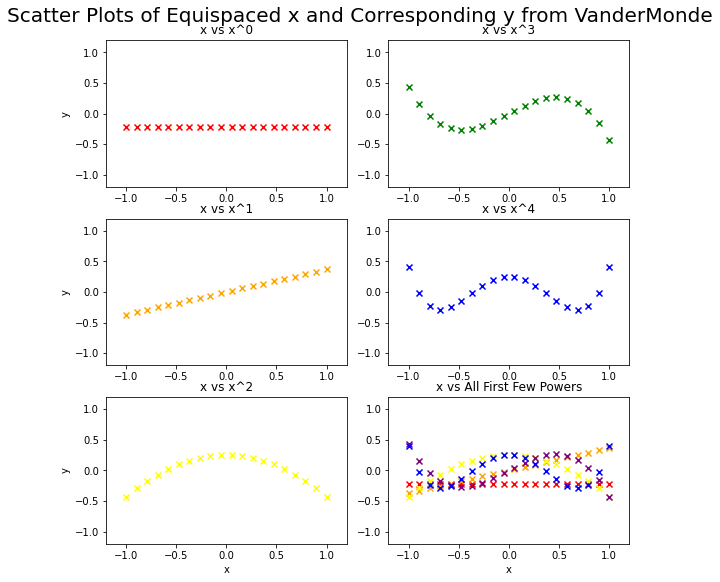

In [5]:
Q_vander,R_vander = np.linalg.qr(vander)   #QR factorization to the Vander Monde matrix
fig, ((ax1,ax4), (ax2,ax5), (ax3,ax6)) = plt.subplots(3,2,figsize=(8,8))
fig.suptitle("Scatter Plots of Equispaced x and Corresponding y from VanderMonde", size=20)
fig.tight_layout()
ax1.set_xlim(-1.2,1.2)
ax1.set_ylim(-1.2,1.2)
ax2.set_xlim(-1.2,1.2)
ax2.set_ylim(-1.2,1.2)
ax3.set_xlim(-1.2,1.2)
ax3.set_ylim(-1.2,1.2)
ax4.set_xlim(-1.2,1.2)
ax4.set_ylim(-1.2,1.2)
ax5.set_xlim(-1.2,1.2)
ax5.set_ylim(-1.2,1.2)
ax6.set_xlim(-1.2,1.2)
ax6.set_ylim(-1.2,1.2)
ax1.set(ylabel='y')
ax2.set(ylabel='y')
ax3.set(ylabel='y', xlabel='x')
ax6.set(xlabel='x')
ax1.title.set_text('x vs x^0')
ax2.title.set_text('x vs x^1')
ax3.title.set_text('x vs x^2')
ax4.title.set_text('x vs x^3')
ax5.title.set_text('x vs x^4')
ax6.title.set_text('x vs All First Few Powers')
ax1.scatter(pts,Q_vander[:,0], marker='x', color='red')
ax2.scatter(pts,Q_vander[:,1], marker='x', color='orange')
ax3.scatter(pts,Q_vander[:,2], marker='x', color='yellow')
ax4.scatter(pts,Q_vander[:,3], marker='x', color='green')
ax5.scatter(pts,Q_vander[:,4], marker='x', color='blue')
ax6.scatter(pts,Q_vander[:,0], marker='x', color='red')
ax6.scatter(pts,Q_vander[:,1], marker='x', color='orange')
ax6.scatter(pts,Q_vander[:,2], marker='x', color='yellow')
ax6.scatter(pts,Q_vander[:,3], marker='x', color='purple')
ax6.scatter(pts,Q_vander[:,4], marker='x', color='blue')

## Q5-Part e
We wish to compute a series of successive approximations to ${y}$, by computing ${Qc^{(j)}}$ where ${j \in 0,..., 10}$. Here, ${c^{(j)}}$ corresponds to the vector ${[c_0, c_1,..., c_j, 0, 0, 0]^T}$. How can we find the best ${c^{(j)}}$ that minimizes the ${||y - Qc^{(j)}||}$ for each ${j}$? Plot ${x}$ vs ${y}$ as well as the approximations for ${j = 0, 5}$ and ${10}$ (which we can name ${y^{(0)}, y^{(5)}, y^{(10)}}$) in a scatter plot, comparing the original relationship to the three approximations.

It is needed that ${Qc^{(j)} \approx y}$. However since ${y}$ can be thought of as a function of the points in ${x}$ on 20-D, the approximations will obviously lack some dimensions. The approximation using ${v^{(0)}}$ will be a constant function because it be the linear combination of the first column of ${Q}$ that is the constant ${x^0}$ function with only itself. As ${c^{(j)}}$ with greater ${j}$ will get to be concerned, the orders will grow, meaning more dimensions to approximate the function on 20-D. Hence, the approximations are going to get better with smaller ${||y - Qc^{(j)}||}$.

Text(0.6, 1, 'Actual points shown in black dots')

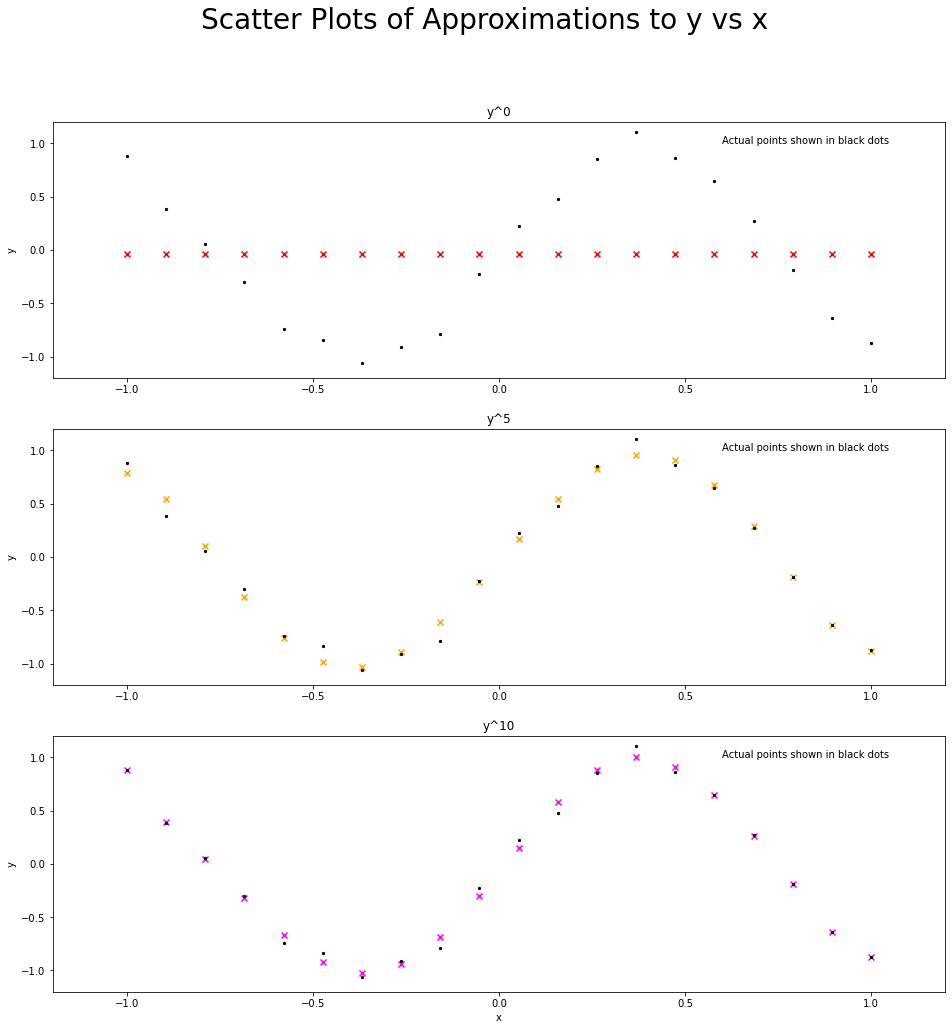

In [11]:
##the approximations are found as Qtrans . Q . c_j = Qtrans . y 
##so c_j = Qtrans . y
##because I introduced y as a ytranspose on the beginning, I take transpose for size compatibility
c_0 = Q_vander[:,0:1].T@pts_y.T
c_5 = Q_vander[:,0:6].T@pts_y.T
c_10 = Q_vander[:,0:11].T@pts_y.T

fig, ((ax1, ax2, ax3)) = plt.subplots(3,1,figsize=(16,16))
fig.suptitle("Scatter Plots of Approximations to y vs x", size=28)
ax1.set_xlim(-1.2,1.2)
ax1.set_ylim(-1.2,1.2)
ax2.set_xlim(-1.2,1.2)
ax2.set_ylim(-1.2,1.2)
ax3.set_xlim(-1.2,1.2)
ax3.set_ylim(-1.2,1.2)
ax1.set(ylabel='y')
ax2.set(ylabel='y')
ax3.set(ylabel='y', xlabel='x')
ax1.title.set_text('y^0')
ax2.title.set_text('y^5')
ax3.title.set_text('y^10')
ax1.scatter(pts, Q_vander[:,0:1]@c_0, marker='x', color='red')
ax1.scatter(pts, pts_y, marker='o', color='black', s=5)
ax2.scatter(pts, Q_vander[:,0:6]@c_5, marker='x', color='orange')
ax2.scatter(pts, pts_y, marker='o', color='black', s=5)
ax3.scatter(pts, Q_vander[:,0:11]@c_10, marker='x', color='magenta')
ax3.scatter(pts, pts_y, marker='o', color='black', s=5)
ax1.text(x=0.6, y=1 , s="Actual points shown in black dots")
ax2.text(x=0.6, y=1 , s="Actual points shown in black dots")
ax3.text(x=0.6, y=1 , s="Actual points shown in black dots")


## Q5-Part f
Repeat the previous approximation experiment with ${Vc^{(j)}}$ where ${j \in 0,..., 10}$. Again compute approximations and plot ${x}$ vs ${y}$ as well as the approximations for ${j = 0, 5}$ and ${10}$. Compare these approximations with those in question 5e. Which approximation worked better? Why do you think this is the case? Do the matrices ${V}$ and ${Q}$ span different subspaces?

Text(0.6, 1, 'Actual points shown in black dots')

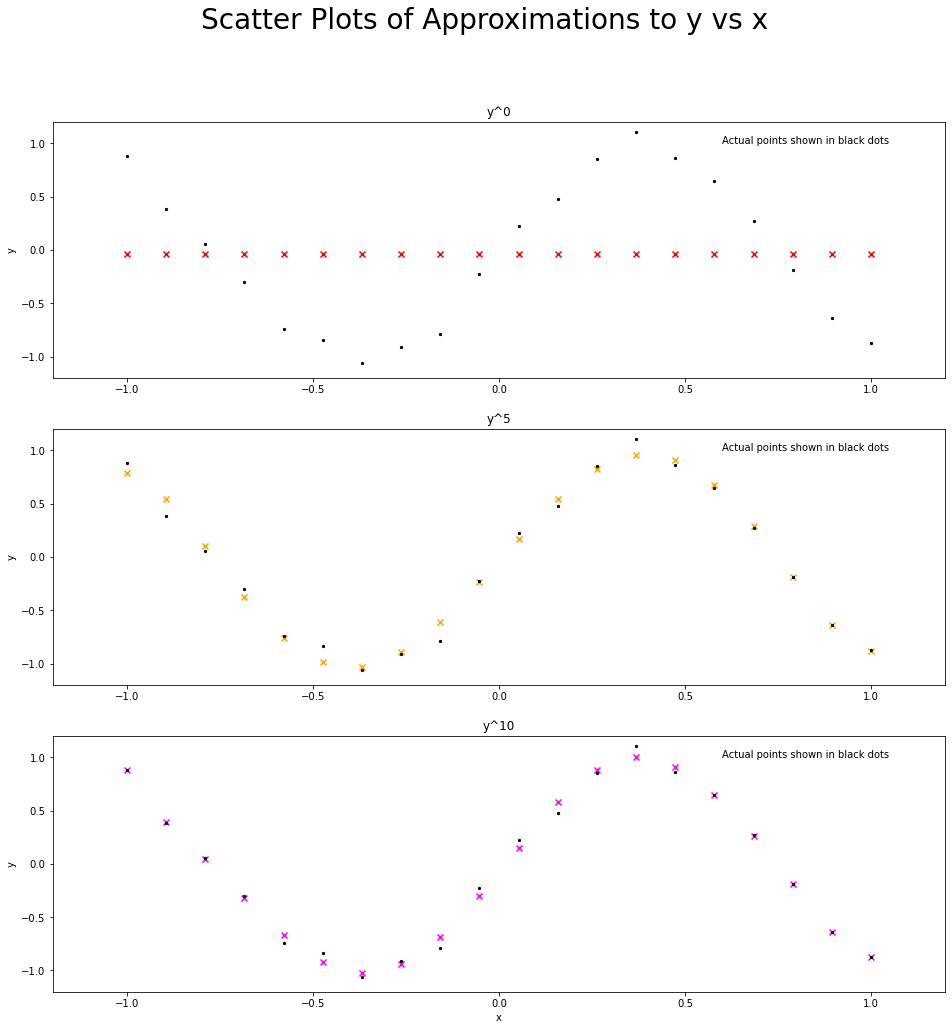

In [12]:
##the approximations are found as pinv(V) . V . theta_j = pinv(V) . y 
##so theta_j = pinv(V) . y
##because I introduced y as a ytranspose on the beginning, I take transpose for size compatibility
thetas_0 = sp.linalg.pinv(vander[:,0:1])@pts_y.T
thetas_5 = sp.linalg.pinv(vander[:,0:6])@pts_y.T
thetas_10 = sp.linalg.pinv(vander)@pts_y.T
fig, ((ax1, ax2, ax3)) = plt.subplots(3,1,figsize=(16,16))
fig.suptitle("Scatter Plots of Approximations to y vs x", size=28)
ax1.set_xlim(-1.2,1.2)
ax1.set_ylim(-1.2,1.2)
ax2.set_xlim(-1.2,1.2)
ax2.set_ylim(-1.2,1.2)
ax3.set_xlim(-1.2,1.2)
ax3.set_ylim(-1.2,1.2)
ax1.set(ylabel='y')
ax2.set(ylabel='y')
ax3.set(ylabel='y', xlabel='x')
ax1.title.set_text('y^0')
ax2.title.set_text('y^5')
ax3.title.set_text('y^10')
ax1.scatter(pts, vander[:,0:1]@thetas_0, marker='x', color='red')
ax1.scatter(pts, pts_y, marker='o', color='black', s=5)
ax2.scatter(pts, vander[:,0:6]@thetas_5, marker='x', color='orange')
ax2.scatter(pts, pts_y, marker='o', color='black', s=5)
ax3.scatter(pts, vander[:,0:11]@thetas_10, marker='x', color='magenta')
ax3.scatter(pts, pts_y, marker='o', color='black', s=5)
ax1.text(x=0.6, y=1 , s="Actual points shown in black dots")
ax2.text(x=0.6, y=1 , s="Actual points shown in black dots")
ax3.text(x=0.6, y=1 , s="Actual points shown in black dots")


Much like the process on part e, the approximations get better and closer to the actual values as more and more columns get used in the process. These added columns can be thought of as additional degrees of freedom on the ${20-}$dimensional space which help define the space better. Approximating with ${Q}$ and ${V}$ both seem to work smoothly, so to check for the performance the **norms** of the distance vectors showing the distance between the actual value and the approximation will be used.

In [9]:
#orthogonal columns approximation distances
sq_0_ort = sp.linalg.norm(pts_y.T-vander[:,0:1]@thetas_0) 
sq_5_ort = sp.linalg.norm(pts_y.T-vander[:,0:6]@thetas_5)
sq_10_ort = sp.linalg.norm(pts_y.T-vander[:,0:11]@thetas_10)

#non-orthogonal, but linearly independent columns approximation distances
sq_0_nort = sp.linalg.norm(pts_y.T-Q_vander[:,0:1]@c_0)
sq_5_nort = sp.linalg.norm(pts_y.T-Q_vander[:,0:6]@c_5)
sq_10_nort = sp.linalg.norm(pts_y.T-Q_vander[:,0:11]@c_10)

print("Norm of the distance vector with Vc(0):" +str(np.round(sq_0_nort,16)) +"\tNorm of the distance vector with Qc(0):" +str(np.round(sq_0_ort,16)))
print("Norm of the distance vector with Vc(5):" +str(np.round(sq_5_nort,16)) +"\tNorm of the distance vector with Qc(5):" +str(np.round(sq_5_ort, 16)))
print("Norm of the distance vector with Vc(10):" +str(np.round(sq_10_nort,16)) +"\tNorm of the distance vector with Qc(10):" +str(np.round(sq_10_ort,16)))

Norm of the distance vector with Vc(0):3.1198399401807566	Norm of the distance vector with Qc(0):3.1198399401807566
Norm of the distance vector with Vc(5):0.329325819432211	Norm of the distance vector with Qc(5):0.3293258194322104
Norm of the distance vector with Vc(10):0.2546750459389898	Norm of the distance vector with Qc(10):0.254675045938992


It can be observed that the methods perform similar to each other on aproximating the actual sines function with random noise element. This is because both ${Q}$ and ${V}$ span the **same** subspace and the degree of freedom or dimensions that these matrices hold are the same. Hence, with the same subspace the approximations and norm of performances are highly similar to each other. Ofcourse, some deviances might have been created by round-off errors but these are all very small. (smaller than ${10^{-15}}$) 

However, in practical application approximating the function with an **orthonormal basis** is more preferrable. This is the case because although the columns of the matrix ${V}$ are linearly independent, they are not entirely orthogonal and carry components from each of others. To approximate the oscillatory behavior of sines, these components are needed to be cancelled out by each other continuously so that the approximation repeatedly grows and decreases. This leads to great variety between the scales of coefficients in ${c}$ as they become greatly big and small in size. Which is not a nice numeric behavior. To not leave the cancellation to the coefficients, it is more efficient to use an **orthonormal basis** which yields coefficients in ${c}$ that are around the same scale.

# Appendices
## Formula for Rotation in 2-D

Any vector in ${2-}$dimensional space can be represented as ${(x_0, y_0)}$, where ${x_0}$ is the horizontal distance of the tip of the vector from the point origin ${(0, 0)}$ in unit dimensions and ${y_0}$ is the vertical distance of the tip of the vector from the point origin ${(0, 0)}$ in unit dimensions. If this vector has length ${L}$ and makes an angle ${\theta}$ with the positive ${x-}$direction then from trigonometry,

${x_0 = Lcos({\theta})}$ and ${y_0 = Lsin({\theta})}$

When this vector is rotated in the counter-clockwise direction for ${\phi}$ degrees, the new coordinates  ${(x_1, y_1)}$ can be written as,

${x_1 = Lcos({\theta} + {\phi})}$ and ${y_1 = Lsin({\theta} + {\phi})}$ since now the angle the rotated vector is making with the positive ${x-}$axis has increased by ${\phi}$.

From the formula for angle sum,

${cos({\theta} + {\phi}) = cos{\theta}cos{\phi} - sin{\theta}sin{\phi}}$

${sin({\theta} + {\phi}) = sin{\theta}cos{\phi} + cos{\theta}sin{\phi}}$

Thus,

${x_1 = L(cos{\theta}cos{\phi} - sin{\theta}sin{\phi})}$ and ${y_1 = L(sin{\theta}cos{\phi} + cos{\theta}sin{\phi})}$

When ${x_0 = Lcos({\theta})}$ and ${y_0 = Lsin({\theta})}$ are plugged in,

${x_1 = x_0cos{\phi} - y_0sin{\phi}}$ and ${y_1 = y_0cos{\phi} + x_0sin{\phi}}$ is proven.

## Formula for Approximating the Non-Existent Right Inverse

The objective is to find a matrix ${X}$ as an approximation to the non-existent right inverse of a tall matrix ${A}$. In other words, the norm of the residual matrix ${R}$ is trying to be kept as **minimum**, where ${R = AX - I}$. 

The square of the norm of any matrix can be also written as the sum of the square of the norms of vectors in its columns. Furthermore, a column-wise representation of the ${n x n}$ matrix ${R}$ can be written as,

${R_i = AX_i - e_i}$, where ${R_i}$ and ${X_i}$ denote to the ${i^{th}}$ columns of the respective matrices so that ${AX_i}$ represents the ${i^{th}}$ column of the matrix ${AX}$ 

And since the identity matrix is subtracted from ${AX}$ to obtain ${R}$, from the ${i^{th}}$ column of the matrix ${AX}$, the ${i^{th}}$ unit vector that is ${e_i}$ is subtracted. So,

${||R||^2 = \sum \limits_{i=1} ^{n} ||{R_i}||^2 = \sum \limits_{i=1} ^{n} ||AX_i - e_i||^2}$

Once written that way, the idea can be clearly seen as to independently minimize the residual in each column of R as this only depends on the specific column of X. Then for each ${i}$, ${X_i}$ is chosen in a way to minimize ${||AX_i - e_i||^2}$, a **least-squares problem**. And the solution is,

${\hat{X_i} = A^{-1}e_i}$ where ${A^{-1}}$ is the left inverse of the tall matrix ${A}$.

To show,

${\hat{X} =    [\hat{x_1},  \hat{x_2},  ...,  \hat{x_m}]}$

${\hat{X} =    [A^{-1}e_1,  A^{-1}e_2,  ...,  A^{-1}e_m]}$

${\hat{X} =    A^{-1}[e_1,  e_2,  ...,  e_m]}$

${\hat{X} =    A^{-1}I}$

${\hat{X} =    A^{-1}}$

# References

[Formula for Rotating a Vector in 2-D](https://matthew-brett.github.io/teaching/rotation_2d.html)

[MatPlotLib Documentation](https://matplotlib.org/stable/index.html)

[Numpy Documentation](https://numpy.org/doc/stable/)

Solution Manual of [IALA](http://vmls-book.stanford.edu/vmls.pdf) on local drive